<a href="https://colab.research.google.com/github/llucasreis/boston_linear_regression/blob/main/sklearn_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Atividade 2 - Regressão Múltipla

**Aluno**: Lucas Pereira Reis (lpr.cid20@uea.edu.br)

In [ ]:
# Carregando o Dataset Boston Houses
from sklearn.datasets import load_boston
boston = load_boston() 

# Carregando Bibliotecas Python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
warnings.filterwarnings("ignore")
%matplotlib inline

In [ ]:
df = pd.DataFrame(boston.data, columns = boston.feature_names)
df['target'] = boston.target

In [ ]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Para identificar qual variável tem com a variável `target`, criou-se um *heatmap* da correlação de Pearson.

As variáveis que mais apresentam mais correlação (seja positiva ou negativa) são `RM`, `LSTAT`, `PTRATIO` e `TAX`. Assim, para esta atividade utilizou-se estas quatro variáveis.

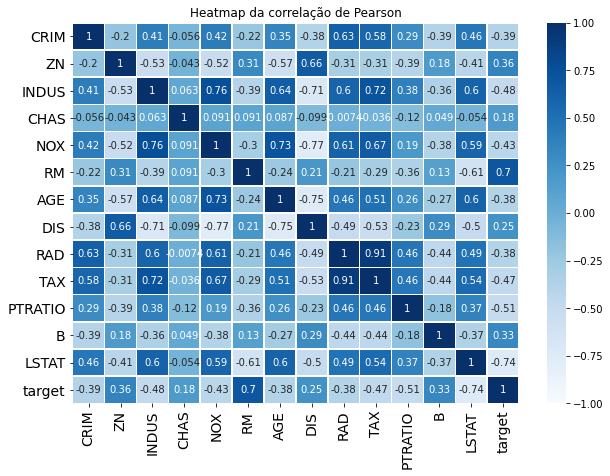

In [ ]:
plt.figure(figsize = (10, 7))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

corr = df.corr()

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,vmin=-1, vmax=1,linewidths=.5, annot=True, cmap="Blues")
plt.title('Heatmap da correlação de Pearson')
plt.show()

In [ ]:
x = df[['RM', 'LSTAT', 'PTRATIO', 'TAX']]
y = df['target']

Nesta atividade optou-se por utilizar a abordagem de *dataset* de treinamento e de teste. Como temos poucas amostras de dados, utilizou-se 90% para treino e 10% para teste

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=33)

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred = lr.predict(x_test)
y_pred

array([18.11407539, 11.15754323, 13.62753006, 18.11627956, 24.22116367,
       22.51806646, 30.97670909, 16.88710323, 29.28092872, 19.96158983,
       31.00003861, 35.35042036,  6.89274263, 25.42987336, 11.0053848 ,
       25.58968671, 18.46506631, 19.01615052, 32.09098565, 22.10937595,
       15.41272313, 17.52129073, 16.61387474, 21.48442851, 31.72784372,
       13.48752988, 24.6819076 , 25.53653991, 12.19345412, 33.70334448,
       15.66881265, 25.52618509,  4.11849483, 22.32422581, 31.26307449,
       30.6785221 , 26.76111261,  1.69681867, 19.05446197, 28.17202986,
       16.47543651, 14.4758038 , 33.92569286, 13.34539878, 29.29730778,
       19.69023587, 23.99332051, 17.43771183, 27.58546261, 19.27821541,
       16.87187261])

## Avaliação do Modelo

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("MAE = {:0.3f}".format(mae))
print("RMSE = {:0.3f}".format(rmse))

MAE = 3.673
RMSE = 4.632
